# 베스트셀러 EDA
2025년 월별 카테고리 분포 및 순위 변동 분석

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from supabase import create_client

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

load_dotenv()
supabase = create_client(os.getenv('SUPABASE_URL'), os.getenv('SUPABASE_KEY'))

## 1. 데이터 로드

In [4]:
# bestsellers 테이블 (월별 순위 정보)
bestsellers_res = supabase.table('bestsellers').select('*').execute()
df_bestsellers = pd.DataFrame(bestsellers_res.data)

# books 테이블 (도서 정보 + 카테고리)
books_res = supabase.table('books').select('product_code, title, category_1, category_2, category_3').execute()
df_books = pd.DataFrame(books_res.data)

print(f"베스트셀러 레코드: {len(df_bestsellers)}")
print(f"도서 레코드: {len(df_books)}")

베스트셀러 레코드: 240
도서 레코드: 105


In [5]:
# 데이터 병합
df = df_bestsellers.merge(df_books, on='product_code', how='left')
df['bestseller_month'] = pd.to_datetime(df['bestseller_month'])
df['month'] = df['bestseller_month'].dt.strftime('%Y-%m')

print(f"병합 후 레코드: {len(df)}")
df.head()

병합 후 레코드: 240


,id,bestseller_month,rank,product_code,rating,review_count,created_at,title,category_1,category_2,category_3,month
0,799,2025-01-01,1,S000215067855,9.2,272,2026-01-11T12:23:04.68642+00:00,왜 그들만 부자가 되는가,금융시스템/위기,부동산/실물자산,None,2025-01
1,800,2025-01-01,2,S000214208202,9.7,607,2026-01-11T12:23:04.68642+00:00,트렌드 코리아 2025,거시경제/금융정책,기업경영/리더십,None,2025-01
2,801,2025-01-01,3,S000214710919,9.9,415,2026-01-11T12:23:04.68642+00:00,트럼프 2.0 시대,거시경제/금융정책,지정학/국제정세,부동산/실물자산,2025-01
3,802,2025-01-01,4,S000001947552,9.7,1586,2026-01-11T12:23:04.68642+00:00,돈의 심리학(30만 부 기념 스페셜 에디션),재테크/개인금융,투자철학/대가,None,2025-01
4,803,2025-01-01,5,S000215014915,9.8,192,2026-01-11T12:23:04.68642+00:00,세스 고딘의 전략 수업(This is Strategy Seth Godin),지정학/국제정세,None,None,2025-01


## 2. 기본 통계

In [21]:
# 월별 도서 수
print("월별 베스트셀러 도서 수:")
print(df.groupby('month').size())

월별 베스트셀러 도서 수:
month
2025-01    20
2025-02    20
2025-03    20
2025-04    20
2025-05    20
2025-06    20
2025-07    20
2025-08    20
2025-09    20
2025-10    20
2025-11    20
2025-12    20
dtype: int64


In [6]:
# 카테고리별 도서 수
print("\n카테고리별 도서 수 (category_1 기준):")
print(df['category_1'].value_counts())


카테고리별 도서 수 (category_1 기준):
category_1
주식투자/트레이딩    62
재테크/개인금융     44
거시경제/금융정책    26
테크/스타트업      20
경제이론/학술      18
기업경영/리더십     17
투자철학/대가      16
부동산/실물자산     14
금융시스템/위기     13
지정학/국제정세     10
Name: count, dtype: int64


In [23]:
# 카테고리 미분류 비율
null_cat = df['category_1'].isna().sum()
print(f"\n카테고리 미분류: {null_cat}건 ({null_cat/len(df)*100:.1f}%)")


카테고리 미분류: 0건 (0.0%)


## 3. 월별 카테고리 분포

In [7]:
# 월별 카테고리 집계
monthly_cat = df.groupby(['month', 'category_1']).size().unstack(fill_value=0)
monthly_cat

category_1,거시경제/금융정책,경제이론/학술,금융시스템/위기,기업경영/리더십,부동산/실물자산,재테크/개인금융,주식투자/트레이딩,지정학/국제정세,테크/스타트업,투자철학/대가
month,,,,,,,,,,
2025-01,3,1,1,1,2,3,4,2,1,2
2025-02,4,1,1,0,3,4,3,2,1,1
2025-03,1,3,1,1,3,3,4,1,2,1
2025-04,1,2,1,2,3,4,4,0,3,0
2025-05,0,2,1,4,2,4,4,1,1,1
2025-06,3,2,2,1,0,4,5,0,2,1
2025-07,2,2,2,1,0,4,5,1,2,1
2025-08,2,2,0,2,0,3,6,1,1,3
2025-09,2,0,1,3,0,3,7,0,2,2


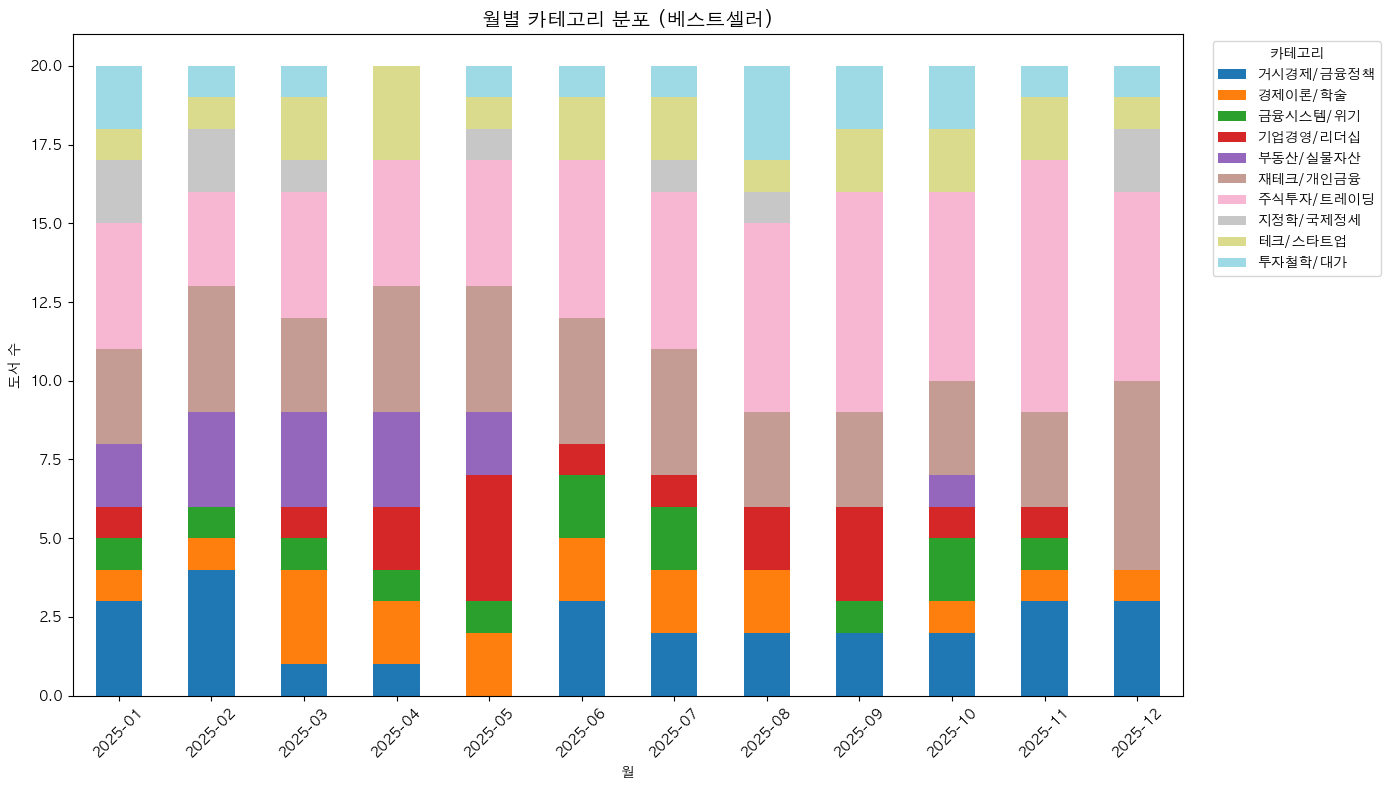

In [25]:
# 월별 카테고리 분포 - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 8))
monthly_cat.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 카테고리 분포 (베스트셀러)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('도서 수')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

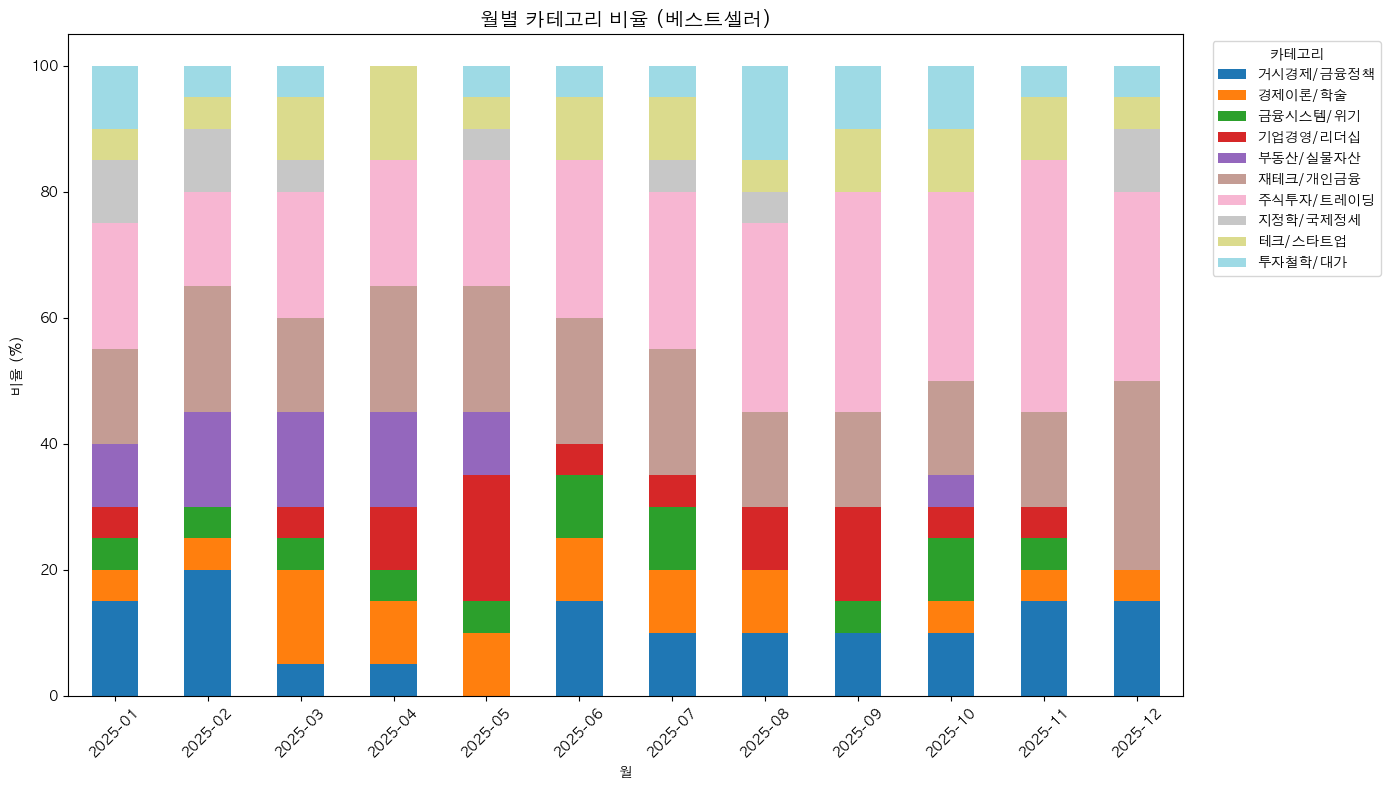

In [26]:
# 월별 카테고리 비율 - 100% Stacked
monthly_cat_pct = monthly_cat.div(monthly_cat.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))
monthly_cat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 카테고리 비율 (베스트셀러)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('비율 (%)')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. 100% Stacked Area Chart (점유율 추이)
df_ratio = monthly_cat.div(monthly_cat.sum(axis=1), axis=0).reset_index().melt(id_vars='month')
fig1 = px.area(df_ratio, x='month', y='value', color='category_1', 
               line_group='category_1', groupnorm='percent',
               title='월별 카테고리 점유율 변화 (2025)',
               labels={'value': '점유율 (%)', 'month': '분석 월', 'category_1': '카테고리'})

# 2. Treemap (전체 비중)
df_total = df['category_1'].value_counts().reset_index()
fig2 = px.treemap(df_total, path=['category_1'], values='count',
                  title='카테고리별 베스트셀러 누적 분포',
                  color='count', color_continuous_scale='Viridis')

# 두 그래프를 한 눈에 보기 (또는 개별 출력 후 캡처)
fig1.show()
fig2.show()

In [9]:
import pandas as pd
import plotly.express as px

# 1. 월별 카테고리별 순위 계산 (도서 수 기준)
# 값이 클수록(도서가 많을수록) 1위가 되도록 설정
rank_df = monthly_cat.rank(axis=1, method='min', ascending=False)

# 2. 데이터 재구조화 (Wide to Long)
rank_stack = rank_df.reset_index().melt(id_vars='month', var_name='category', value_name='rank')

# 3. 시각화를 위해 상위권 데이터만 필터링 (한 번이라도 TOP 3에 진입했던 카테고리들)
top_categories = rank_stack[rank_stack['rank'] <= 3]['category'].unique()
df_plot = rank_stack[rank_stack['category'].isin(top_categories)]

# 4. Plotly를 이용한 Bump Chart 그리기
fig3 = px.line(df_plot, x='month', y='rank', color='category',
               title='월별 TOP 3 카테고리 순위 변동 추이',
               markers=True, 
               labels={'rank': '순위', 'month': '분석 월', 'category': '카테고리'},
               category_orders={"rank": [1, 2, 3, 4, 5]}) # 순위가 높을수록 위에 보이게 설정

# 5. 레이아웃 최적화 (Y축 반전 및 디자인)
fig3.update_yaxes(autorange="reversed", tickmode='linear', tick0=1, dtick=1)
fig3.update_layout(
    plot_bgcolor='white',
    hovermode='x unified',
    xaxis_title="2025년 월별 추이",
    yaxis_title="순위 (1위가 최상단)"
)

fig3.show()

In [27]:
import plotly.express as px

# 월별 카테고리 실적 데이터 재구조화 (Wide to Long)
# Plotly Express는 Tidy Data 형태에서 가장 잘 작동합니다.
monthly_cat_long = monthly_cat.reset_index().melt(id_vars='month', var_name='category_1', value_name='count')

# 100% Stacked Area Chart 생성
# groupnorm='percent' 옵션을 통해 자동으로 100% 비중으로 정규화합니다.
fig = px.area(monthly_cat_long, 
              x='month', 
              y='count', 
              color='category_1', 
              groupnorm='percent',
              title='월별 카테고리 점유율 변화 추이 (100% Stacked Area)',
              labels={'month': '분석 월', 'count': '점유율 비중 (%)', 'category_1': '카테고리'},
              color_discrete_sequence=px.colors.qualitative.Pastel)

# 인터랙티브 레이아웃 및 디자인 최적화
fig.update_layout(
    yaxis_ticksuffix='%', 
    hovermode='x unified',        # 마우스 오버 시 해당 시점의 모든 데이터 합쳐서 표시
    legend_title='카테고리',
    xaxis_title='월 (2025)',
    yaxis_title='점유율 비중',
    font=dict(size=12),
    plot_bgcolor='white'
)

# 그리드 및 축 설정
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='whitesmoke')

fig.show()

In [33]:
import plotly.graph_objects as go

# 1. 데이터 준비 (monthly_cat: index=month, columns=category_1)
categories_count = monthly_cat.columns.tolist()

fig = go.Figure()

# 2. 각 카테고리별로 개수 변화 선(Trace) 추가
for i, cat in enumerate(categories_count):
    fig.add_trace(
        go.Scatter(
            x=monthly_cat.index,
            y=monthly_cat[cat],
            name=cat,
            mode='lines+markers+text', # 텍스트(숫자) 추가 선택 가능
            line=dict(width=2.5),      # 선 두께
            marker=dict(size=10),
            opacity=0.7,
            # text=monthly_cat[cat],     # 점 위에 개수 표시
            textposition="top center"
        )
    )

# 3. 버튼(드롭다운 메뉴) 구성 - 이전과 동일한 로직
buttons_count = []

# '전체 보기' 버튼
buttons_count.append(dict(
    method="update",
    label="전체 보기",
    args=[{"visible": [True] * len(categories_count),
           "line.width": [2.5] * len(categories_count),
           "opacity": [0.7] * len(categories_count)}]
))

# 개별 카테고리 강조 버튼들
for i, selected_cat in enumerate(categories_count):
    opacities = [0.1] * len(categories_count)
    opacities[i] = 1.0
    widths = [1] * len(categories_count)
    widths[i] = 6 # 강조 시 더 굵게
    
    buttons_count.append(dict(
        method="update",
        label=selected_cat,
        args=[{"opacity": opacities,
               "line.width": widths}]
    ))

# 4. 레이아웃 및 디자인 설정
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_count,
            direction="down",
            showactive=True,
            x=0.0, xanchor="left",
            y=1.15, yanchor="top"
        )
    ],
    title=dict(
        text='<b>월별 카테고리별 TOP 20 진입 수 현황</b>',
        x=0.5, y=0.95,
        font=dict(size=20)
    ),
    yaxis=dict(
        title='진입 수(권)',
        gridcolor='whitesmoke',
        dtick=1 # 정수 단위로 격자 표시
    ),
    xaxis=dict(
        title='월',
        gridcolor='whitesmoke'
    ),
    plot_bgcolor='white',
    hovermode='x unified', # 개수 비교 시에는 x unified가 더 편리함
    height=700,
    showlegend=True
)

fig.show()

In [34]:
import plotly.graph_objects as go
import numpy as np

# 1. '차트 아웃' 처리를 위해 0을 NaN으로 치환
# 0인 구간은 선이 연결되지 않고 데이터 포인트도 생기지 않습니다.
monthly_cat_out = monthly_cat.replace(0, np.nan)
categories_count = monthly_cat_out.columns.tolist()

fig = go.Figure()

# 2. 각 카테고리별로 데이터 추가
for i, cat in enumerate(categories_count):
    fig.add_trace(
        go.Scatter(
            x=monthly_cat_out.index,
            y=monthly_cat_out[cat],
            name=cat,
            mode='lines+markers',
            connectgaps=False,     # 중요: 데이터가 없는(NaN) 구간은 선을 잇지 않음
            line=dict(width=3),
            marker=dict(size=10, line=dict(width=1, color='white')),
            opacity=0.7,
            hovertemplate='<b>' + cat + '</b><br>진입 도수: %{y}권<extra></extra>'
        )
    )

# 3. 버튼 로직 (동일하게 하이라이트 기능 유지)
buttons_out = []
buttons_out.append(dict(
    method="update",
    label="전체 보기",
    args=[{"visible": [True] * len(categories_count),
           "line.width": [3] * len(categories_count),
           "opacity": [0.7] * len(categories_count)}]
))

for i, selected_cat in enumerate(categories_count):
    opacities = [0.1] * len(categories_count)
    opacities[i] = 1.0
    widths = [1] * len(categories_count)
    widths[i] = 6 
    
    buttons_out.append(dict(
        method="update",
        label=selected_cat,
        args=[{"opacity": opacities, "line.width": widths}]
    ))

# 4. 레이아웃 설정
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_out,
            direction="down",
            showactive=True,
            x=0.0, xanchor="left",
            y=1.15, yanchor="top"
        )
    ],
    title=dict(
        text='<b>월별 카테고리별 TOP 20 진입 도수 (Chart Out 적용)</b>',
        x=0.5, y=0.95,
        font=dict(size=18, color="#2c3e50")
    ),
    yaxis=dict(
        title='진입 도수 (권)',
        gridcolor='whitesmoke',
        dtick=1,
        range=[0.5, monthly_cat.max().max() + 0.5] # 0인 부분은 아예 눈금에서 제외하거나 1부터 시작하게 느낌을 줌
    ),
    xaxis=dict(
        title='분석 월',
        gridcolor='whitesmoke',
        showline=True,
        linecolor='lightgrey'
    ),
    plot_bgcolor='white',
    hovermode='closest',
    height=650
)

# 안내 주석 추가
fig.add_annotation(
    text="※ 진입 도수가 0권인 달은 선이 끊어지며 '차트 아웃' 상태로 표시됩니다.",
    xref="paper", yref="paper", x=1.1, y=-0.15, showarrow=False,
    font=dict(size=10, color="indianred")
)

fig.show()

## 4. 카테고리별 순위 변동 추이

In [28]:
# 카테고리별 월평균 순위
cat_rank = df.groupby(['month', 'category_1'])['rank'].mean().unstack()
cat_rank

category_1,거시경제/금융정책,경제이론/학술,금융시스템/위기,기업경영/리더십,부동산/실물자산,재테크/개인금융,주식투자/트레이딩,지정학/국제정세,테크/스타트업,투자철학/대가
month,,,,,,,,,,
2025-01,5.333333,7.0,1.0,13.000000,15.000000,8.333333,14.000000,7.5,19.000000,14.000000
2025-02,10.500000,9.0,1.0,NaN,15.666667,10.750000,8.000000,9.0,16.000000,10.000000
2025-03,2.000000,13.0,6.0,19.000000,11.000000,10.333333,7.000000,7.0,13.500000,18.000000
2025-04,4.000000,14.0,20.0,11.500000,9.666667,13.750000,6.500000,NaN,8.333333,NaN
2025-05,NaN,15.0,12.0,15.000000,8.500000,10.500000,8.250000,2.0,10.000000,4.000000
2025-06,6.333333,14.0,9.5,8.000000,NaN,11.000000,14.000000,NaN,10.500000,1.000000
2025-07,5.500000,15.5,16.5,10.000000,NaN,7.250000,12.000000,3.0,14.500000,4.000000
2025-08,14.000000,19.5,NaN,16.500000,NaN,8.666667,8.833333,6.0,2.000000,7.666667
2025-09,1.500000,NaN,5.0,15.666667,NaN,11.333333,11.571429,NaN,13.500000,6.500000


In [30]:
import plotly.express as px

# 데이터 재구조화 (Wide to Long)
cat_rank_long = cat_rank.reset_index().melt(id_vars='month', var_name='category_1', value_name='avg_rank')

# 결측치(NaN) 제거 (해당 월에 베스트셀러가 없는 카테고리는 선 연결 시 중단됨)
cat_rank_long = cat_rank_long.dropna(subset=['avg_rank'])

# Line Chart 생성
fig = px.line(cat_rank_long, 
              x='month', 
              y='avg_rank', 
              color='category_1',
              markers=True,         # 데이터 포인트 강조
              title='카테고리별 월평균 순위 변동 추이',
              labels={'month': '월', 'avg_rank': '평균 순위', 'category_1': '카테고리'},
              render_mode='svg')    # 선의 미려함을 위해 svg 모드 권장

# 순위 데이터에 최적화된 레이아웃 설정
fig.update_layout(
    yaxis=dict(
        autorange='reversed',      # Y축 반전: 1위가 가장 위로 오도록 설정
        gridcolor='whitesmoke',
        zerolinecolor='lightgrey'
    ),
    xaxis=dict(
        tickangle=45,
        gridcolor='whitesmoke'
    ),
    hovermode='x unified',         # 마우스 오버 시 한 번에 모든 카테고리 순위 비교
    plot_bgcolor='white',
    legend_title='카테고리 (클릭 시 ON/OFF)',
    margin=dict(l=50, r=50, t=80, b=50)
)

# 호버 시 상세 정보 표시 설정
fig.update_traces(
    mode='lines+markers',
    hovertemplate='<b>%{fullData.name}</b><br>평균 순위: %{y:.1f}위<extra></extra>'
)

fig.show()

In [31]:
import plotly.graph_objects as go
import pandas as pd

# 1. 데이터 준비 (Tidy Data 형태가 아닌 Wide Data를 사용하면 버튼 구현이 더 직관적입니다)
# cat_rank는 index가 month, columns가 카테고리인 상태로 가정합니다.
categories = cat_rank.columns.tolist()

fig = go.Figure()

# 2. 각 카테고리별로 Trace(선) 추가
for i, cat in enumerate(categories):
    fig.add_trace(
        go.Scatter(
            x=cat_rank.index,
            y=cat_rank[cat],
            name=cat,
            mode='lines+markers',
            line=dict(width=2),        # 기본 두께
            marker=dict(size=8),
            opacity=0.7                # 기본 투명도 (전체보기 시)
        )
    )

# 3. 버튼(드롭다운 메뉴) 구성
buttons = []

# '전체 보기' 버튼
buttons.append(dict(
    method="update",
    label="전체 보기",
    args=[{"visible": [True] * len(categories),
           "line.width": [2] * len(categories),
           "opacity": [0.7] * len(categories)}]
))

# 개별 카테고리 선택 버튼들
for i, selected_cat in enumerate(categories):
    # 선택된 것만 선명(opacity 1.0, 두께 5), 나머지는 흐리게(opacity 0.1, 두께 1)
    opacities = [0.1] * len(categories)
    opacities[i] = 1.0
    widths = [1] * len(categories)
    widths[i] = 5
    
    buttons.append(dict(
        method="update",
        label=selected_cat,
        args=[{"opacity": opacities,
               "line.width": widths}]
    ))

# 4. 레이아웃 업데이트
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top",
            font=dict(color="black")
        )
    ],
    title=dict(
        text='카테고리별 순위 추이 (카테고리 선택 시 강조)',
        x=0.5, y=0.95
    ),
    yaxis=dict(
        autorange='reversed',   # 순위 반전
        title='평균 순위',
        gridcolor='whitesmoke'
    ),
    xaxis=dict(
        title='월',
        gridcolor='whitesmoke',
        tickangle=0
    ),
    plot_bgcolor='white',
    hovermode='closest',
    height=700
)

# 안내 문구 추가 (Annotation)
fig.add_annotation(
    text="드롭다운 메뉴에서 카테고리를 선택하면<br>해당 선만 강조됩니다.",
    xref="paper", yref="paper",
    x=1.2, y=1.05, showarrow=False,
    font=dict(size=11, color="gray"),
    align="left"
)

fig.show()

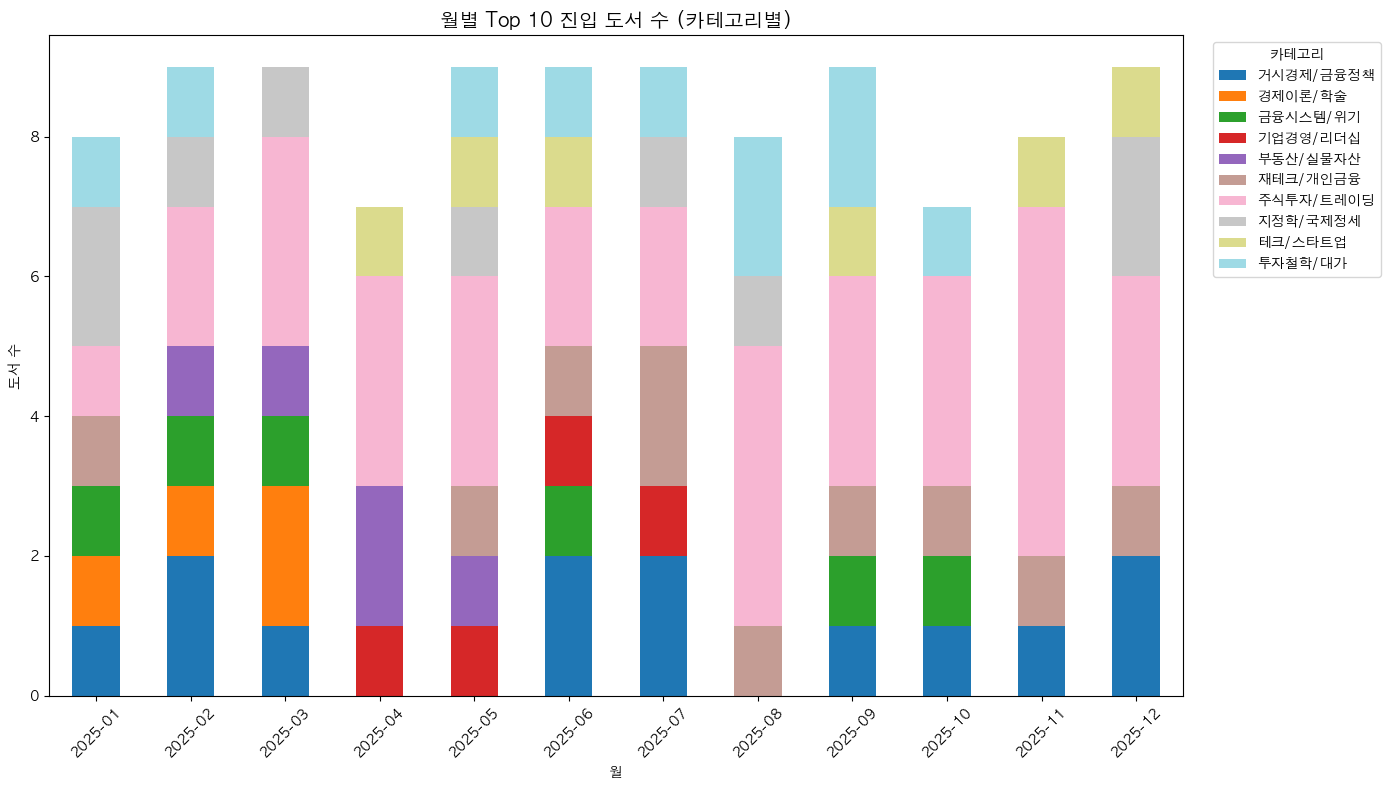

In [13]:
# 카테고리별 Top 10 진입 도서 수
df_top10 = df[df['rank'] <= 10]
top10_monthly = df_top10.groupby(['month', 'category_1']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))
top10_monthly.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title('월별 Top 10 진입 도서 수 (카테고리별)', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('도서 수')
ax.legend(title='카테고리', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. 히트맵: 월별 카테고리 분포

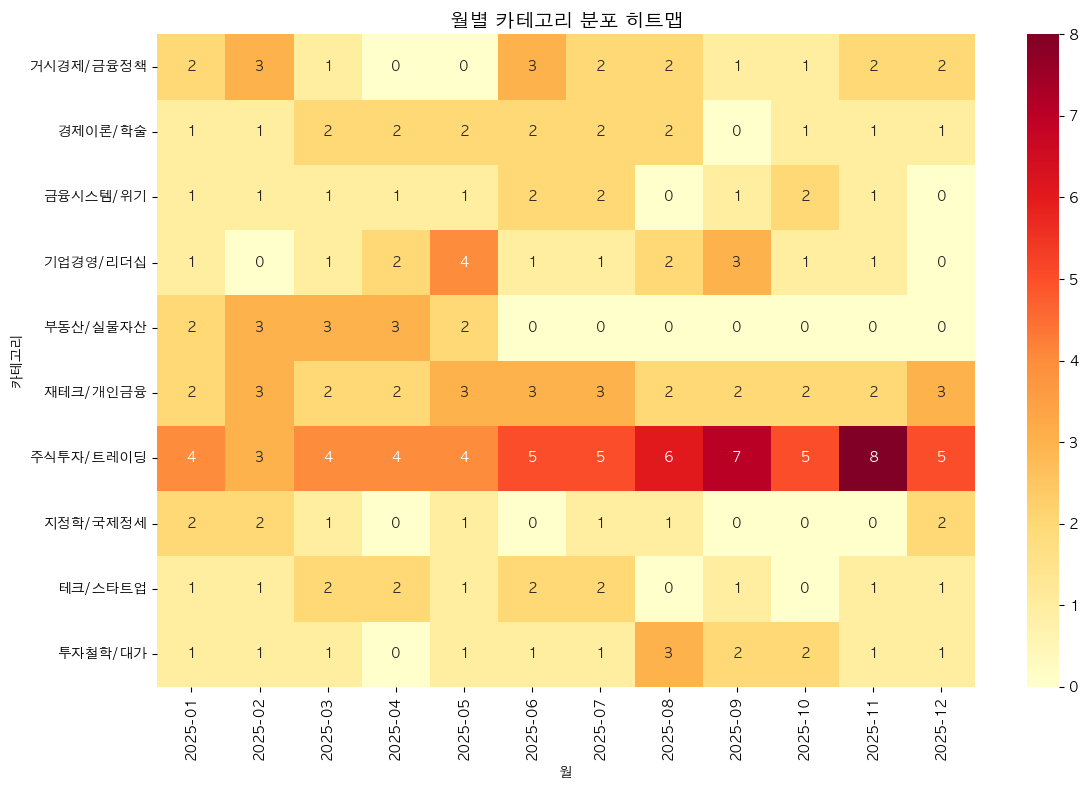

In [14]:
# 히트맵
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(monthly_cat.T, annot=True, fmt='d', cmap='YlOrRd', ax=ax)
ax.set_title('월별 카테고리 분포 히트맵', fontsize=14)
ax.set_xlabel('월')
ax.set_ylabel('카테고리')
plt.tight_layout()
plt.show()

## 6. 주요 인사이트 요약

In [15]:
# 각 월에서 가장 많은 카테고리
print("월별 최다 카테고리:")
for month in monthly_cat.index:
    top_cat = monthly_cat.loc[month].idxmax()
    count = monthly_cat.loc[month].max()
    print(f"  {month}: {top_cat} ({count}권)")

월별 최다 카테고리:
  2025-01: 주식투자/트레이딩 (4권)
  2025-02: 거시경제/금융정책 (3권)
  2025-03: 주식투자/트레이딩 (4권)
  2025-04: 주식투자/트레이딩 (4권)
  2025-05: 기업경영/리더십 (4권)
  2025-06: 주식투자/트레이딩 (5권)
  2025-07: 주식투자/트레이딩 (5권)
  2025-08: 주식투자/트레이딩 (6권)
  2025-09: 주식투자/트레이딩 (7권)
  2025-10: 주식투자/트레이딩 (5권)
  2025-11: 주식투자/트레이딩 (8권)
  2025-12: 주식투자/트레이딩 (5권)


In [35]:
import plotly.graph_objects as go
import pandas as pd

# 1. 가중치 계산 (1위: 20점 ~ 20위: 1점)
df['rank_score'] = 21 - df['rank']

# 2. 월별/카테고리별 가중치 합산 (Market Impact Score)
cat_impact = df.groupby(['month', 'category_1'])['rank_score'].sum().unstack().fillna(0)
categories_impact = cat_impact.columns.tolist()

# 3. 그래프 생성
fig = go.Figure()

for i, cat in enumerate(categories_impact):
    # 0점인 구간은 '차트 아웃'으로 보기 위해 NaN 처리
    y_values = cat_impact[cat].replace(0, np.nan)
    
    fig.add_trace(
        go.Scatter(
            x=cat_impact.index,
            y=y_values,
            name=cat,
            mode='lines+markers',
            connectgaps=False,  # 0점 구간 선 끊기
            line=dict(width=3),
            marker=dict(size=10),
            opacity=0.7,
            hovertemplate='<b>' + cat + '</b><br>영향력 지수: %{y}점<extra></extra>'
        )
    )

# 4. 버튼 로직 (하이라이트 기능)
buttons_impact = []
buttons_impact.append(dict(
    method="update", label="전체 보기",
    args=[{"visible": [True] * len(categories_impact),
           "line.width": [3] * len(categories_impact),
           "opacity": [0.7] * len(categories_impact)}]
))

for i, selected_cat in enumerate(categories_impact):
    opacities = [0.1] * len(categories_impact)
    opacities[i] = 1.0
    widths = [1] * len(categories_impact)
    widths[i] = 6 
    
    buttons_impact.append(dict(
        method="update", label=selected_cat,
        args=[{"opacity": opacities, "line.width": widths}]
    ))

# 5. 레이아웃 설정
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_impact,
            direction="down", showactive=True,
            x=0.0, xanchor="left", y=1.15, yanchor="top"
        )
    ],
    title=dict(
        text='<b>카테고리별 월간 시장 영향력 추이 (역순위 가중치 합산)</b>',
        x=0.5, y=0.95, font=dict(size=18)
    ),
    yaxis=dict(
        title='시장 영향력 점수 (가중치 합계)',
        gridcolor='whitesmoke',
        # 점수가 높을수록 좋은 것이므로 여기서는 Y축을 반전시키지 않습니다.
    ),
    xaxis=dict(title='분석 월', gridcolor='whitesmoke'),
    plot_bgcolor='white',
    hovermode='x unified',
    height=700
)

# 설명 추가
fig.add_annotation(
    text="* 가중치: 1위(20점) ~ 20위(1점) 합산<br>* 높을수록 해당 월의 시장 점유 활성도가 높음을 의미",
    xref="paper", yref="paper", x=1.1, y=-0.15, showarrow=False,
    font=dict(size=10, color="gray"), align="left"
)

fig.show()

In [36]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# 1. 데이터 준비
categories = cat_impact.columns.tolist()
# 평균 순위 데이터 (0은 NaN 처리하여 차트 아웃 반영)
cat_avg_rank_out = cat_rank.replace(0, np.nan) 
# 영향력 지수 데이터
cat_impact_out = cat_impact.replace(0, np.nan)

# 2. 서브플롯 생성 (2행 1열, X축 공유)
fig = make_subplots(
    rows=2, cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.1,
    subplot_titles=("<b>시장 영향력 지수 (가중치 합산)</b>", "<b>월평균 순위 (Y축 반전)</b>")
)

# 3. 각 카테고리별로 상/하단 차트에 데이터 추가
for i, cat in enumerate(categories):
    # 상단: 영향력 점수
    fig.add_trace(
        go.Scatter(
            x=cat_impact_out.index, y=cat_impact_out[cat],
            name=cat, legendgroup=cat, # 범례 그룹화 (하나 클릭 시 둘 다 제어)
            mode='lines+markers', line=dict(width=3), opacity=0.7,
            hovertemplate='<b>' + cat + '</b><br>영향력: %{y}점<extra></extra>'
        ), row=1, col=1
    )
    # 하단: 평균 순위
    fig.add_trace(
        go.Scatter(
            x=cat_avg_rank_out.index, y=cat_avg_rank_out[cat],
            name=cat, legendgroup=cat, showlegend=False, # 상단과 중복되므로 범례 숨김
            mode='lines+markers', line=dict(width=3), opacity=0.7,
            hovertemplate='<b>' + cat + '</b><br>평균 순위: %{y:.1f}위<extra></extra>'
        ), row=2, col=1
    )

# 4. 버튼 로직 (하이라이트 기능 - 상하단 모두 적용)
buttons = []
n_cats = len(categories)

# 전체 보기
buttons.append(dict(
    method="update", label="전체 보기",
    args=[{"opacity": [0.7] * (n_cats * 2), "line.width": [3] * (n_cats * 2)}]
))

# 개별 하이라이트 (상단 n개 + 하단 n개 트레이스 모두 업데이트)
for i in range(n_cats):
    opacities = [0.1] * (n_cats * 2)
    opacities[i] = 1.0           # 상단 차트 해당 카테고리
    opacities[i + n_cats] = 1.0  # 하단 차트 해당 카테고리
    
    widths = [1] * (n_cats * 2)
    widths[i] = 6
    widths[i + n_cats] = 6
    
    buttons.append(dict(
        method="update", label=categories[i],
        args=[{"opacity": opacities, "line.width": widths}]
    ))

# 5. 레이아웃 설정
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", showactive=True, x=0, y=1.2)],
    title=dict(text='카테고리별 시장 성과 대시보드', x=0.5, y=0.98, font=dict(size=22)),
    height=800, plot_bgcolor='white', hovermode='closest'
)

# Y축 세부 설정
fig.update_yaxes(title_text="영향력 점수", row=1, col=1, gridcolor='whitesmoke')
fig.update_yaxes(title_text="평균 순위", row=2, col=1, gridcolor='whitesmoke', autorange='reversed')
fig.update_xaxes(gridcolor='whitesmoke')

fig.show()

In [16]:
# 카테고리별 변동성 (표준편차)
print("\n카테고리별 월간 변동성 (표준편차):")
volatility = monthly_cat.std().sort_values(ascending=False)
print(volatility)


카테고리별 월간 변동성 (표준편차):
category_1
주식투자/트레이딩    1.414214
부동산/실물자산     1.378954
기업경영/리더십     1.164500
거시경제/금융정책    0.996205
지정학/국제정세     0.834847
투자철학/대가      0.753778
테크/스타트업      0.717741
금융시스템/위기     0.668558
경제이론/학술      0.668558
재테크/개인금융     0.514929
dtype: float64


# 베스트셀러 EDA
2025년 월별 카테고리 분포 및 순위 변동 분석

1. 주식투자/트레이딩 - 꾸준하게 베스트셀러에 등장, 특히 하반기 증가폭


  │ 기간 │ 전체 │ Top 10 │

  │ 1월  │ 4권  │ 1권    │ 

  │ 8월  │ 6권  │ 4권    │

  │ 11월 │ 8권  │ 5권    │

  → 하반기로 갈수록 주식 도서가 베스트셀러 과반수 이상. 2025년 코스피 상승장과 연관?

  ---
  2. 부동산/실물자산 - 6월 이후 완전 소멸

  - 1~5월: 매달 1~3권씩 존재
  - 6월 이후: 0권

  → 부동산 시장 침체/금리 이슈 반영 가능성

  ---
  3. 지정학/국제정세 - 특정 시점에만 등장

  - 1~3월: 있음 (세계대전망 등)
  - 4~6월: 없음
  - 7~8월: "새로운 질서" 등장
  - 12월: 다시 등장 ("피지컬 AI 패권 전쟁", "2026 세계대전망")

  → 트럼프 관련 이슈, 연말 전망서 시즌과 연관

  ---
  4. 투자철학/대가 - 주식 열풍 따라 상승

  - 상반기 Top 10: 0~1권
  - 8~9월 Top 10: 2권씩

  → 주식 관심 증가 → "제대로 배우자" 수요?

  ---
   결론: 부동산 소멸 시점, 주식 급증 시점이 뉴스 트렌드와 얼마나 일치하는지 확인

